In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [5]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [10]:
df.drop('purpose',axis=1,inplace=True)

In [11]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


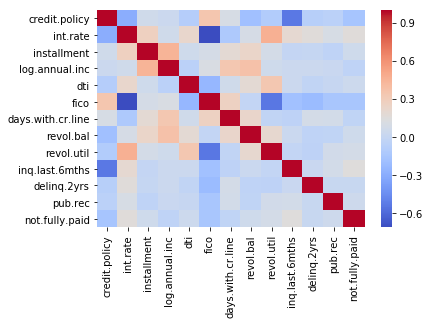

In [13]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss= StandardScaler()

In [16]:
scale_arr = ss.fit_transform(df.drop('not.fully.paid',axis=1))

In [17]:
scale_arr

array([[ 0.49222226, -0.13931753,  2.46309947, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226, -0.57886837, -0.43885443, ..., -0.71698894,
        -0.29973008, -0.23700318],
       [ 0.49222226,  0.48648368,  0.23070836, ..., -0.26247044,
        -0.29973008, -0.23700318],
       ...,
       [-2.03160257, -0.57886837, -1.06867038, ...,  2.91915909,
        -0.29973008, -0.23700318],
       [-2.03160257,  1.39166043,  0.1569135 , ...,  1.55560358,
        -0.29973008, -0.23700318],
       [-2.03160257,  0.61685894,  2.58060136, ...,  2.01012208,
        -0.29973008, -0.23700318]])

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
x_pca = pca.fit_transform(scale_arr)

In [22]:
X = pd.DataFrame(data=x_pca,columns=['A','B'])

In [23]:
X.head()

,A,B
0,-0.250976,2.247895
1,-0.042239,0.004555
2,-0.053444,-0.670060
3,-0.418651,-0.017390
4,0.657729,-0.517553


In [24]:
y =df['not.fully.paid']

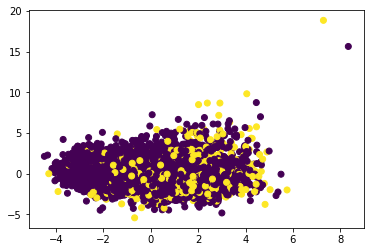

In [25]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtcl = DecisionTreeClassifier()

In [42]:
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
ypred = dtcl.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(ypred,y_test)

array([[2015,  351],
       [ 421,   87]], dtype=int64)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfcl = RandomForestClassifier()

In [48]:
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
rf_ypred=rfcl.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(rf_ypred,y_test)

array([[2325,  413],
       [ 111,   25]], dtype=int64)